# Azure Face API Demo

- **Accessories**. Whether the given face has accessories. This attribute returns possible accessories including headwear, glasses, and mask, with confidence score between zero and one for each accessory.

- **Age**. The estimated age in years of a particular face.

- **Blur**. The blurriness of the face in the image. This attribute returns a value between zero and one and an informal rating of low, medium, or high.

- **Emotion**. A list of emotions with their detection confidence for the given face. Confidence scores are normalized, and the scores across all emotions add up to one. The emotions returned are happiness, sadness, neutral, anger, contempt, disgust, surprise, and fear.

- **Exposure**. The exposure of the face in the image. This attribute returns a value between zero and one and an informal rating of underExposure, goodExposure, or overExposure.

- **Facial hair**. The estimated facial hair presence and the length for the given face.

- **Gender**. The estimated gender of the given face. Possible values are male, female, and genderless.

- **Glasses**. Whether the given face has eyeglasses. Possible values are NoGlasses, ReadingGlasses, Sunglasses, and Swimming Goggles.

- **Hair**. The hair type of the face. This attribute shows whether the hair is visible, whether baldness is detected, and what hair colors are detected.

- **Head pose**. The face's orientation in 3D space. This attribute is described by the roll, yaw, and pitch angles in degrees, which are defined according to the right-hand rule. The order of three angles is roll-yaw-pitch, and each angle's value range is from -180 degrees to 180 degrees. 3D orientation of the face is estimated by the roll, yaw, and pitch angles in order. 

- **Makeup**. Whether the face has makeup. This attribute returns a Boolean value for eyeMakeup and lipMakeup.

- **Mask**. Whether the face is wearing a mask. This attribute returns a possible mask type, and a Boolean value to indicate whether nose and mouth are covered.

- **Noise**. The visual noise detected in the face image. This attribute returns a value between zero and one and an informal rating of low, medium, or high.

- **Occlusion**. Whether there are objects blocking parts of the face. This attribute returns a Boolean value for eyeOccluded, foreheadOccluded, and mouthOccluded.

- **Smile**. The smile expression of the given face. This value is between zero for no smile and one for a clear smile.

<img src="https://docs.microsoft.com/ja-jp/azure/cognitive-services/face/images/landmarks.1.jpg">

https://azure.microsoft.com/en-us/services/cognitive-services/face/

In [1]:
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
import os
import requests
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2
import pandas as pd
import urllib
import operator

In [2]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [3]:
image_url = 'https://github.com/retkowsky/AzureCognitiveServicesFaceAPI/blob/main/images/face%20(1).jpg?raw=true'
image_file = 'test1.jpg'
urllib.request.urlretrieve(image_url, filename=image_file)

('test1.jpg', <http.client.HTTPMessage at 0x7ff301c52da0>)

In [4]:
image = cv2.imread(image_file)
h, w, c = image.shape
print('Width:', w)
print('Height:', h)
print('Channel:', c)
print('Size:', image.size)

Width: 1024
Height: 1024
Channel: 3
Size: 3145728


In [5]:
def imageview(imagename):
    plt.figure(figsize=(15, 15))
    image_rgb = cv2.cvtColor(imagename, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)

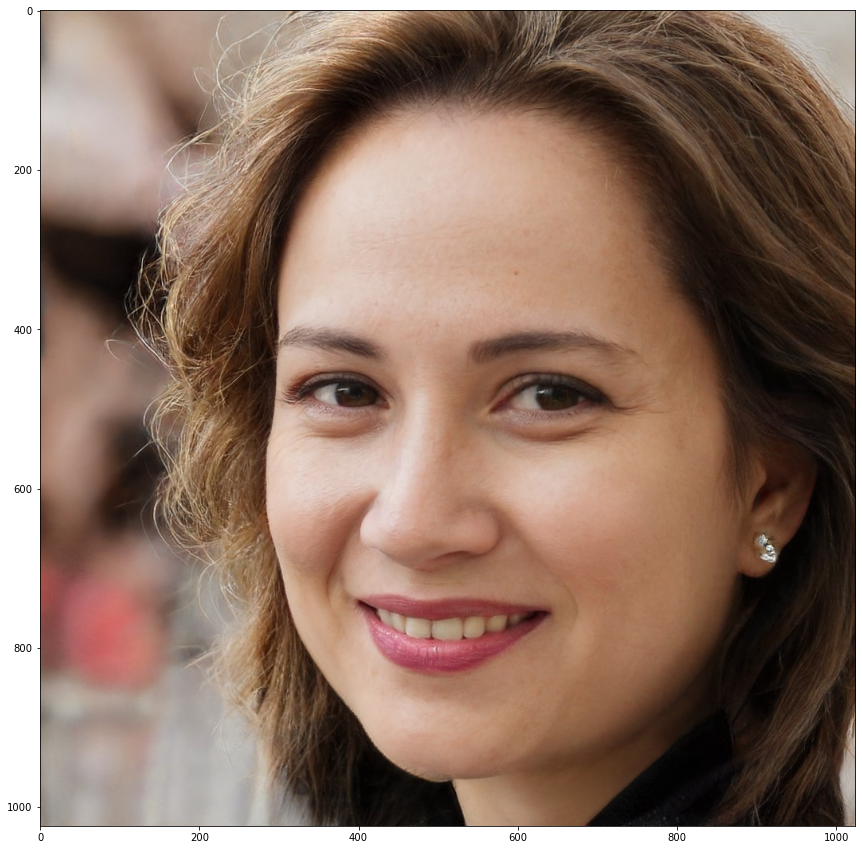

In [6]:
imageview(image)

## Face API

In [7]:
face_api_key = 'tobereplaced'
face_endpoint = 'tobereplaced'

In [8]:
face_client = FaceClient(face_endpoint, CognitiveServicesCredentials(face_api_key))

In [9]:
faceimage = open(image_file, 'rb')
face_api_url = face_endpoint + "face/v1.0/detect"
headers = {'Content-Type': 'application/octet-stream',
'Ocp-Apim-Subscription-Key': face_api_key}

params = {
'returnFaceId': 'true',
'returnFaceLandmarks': 'true',
'returnFaceAttributes' : 'age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure, noise',
'recognitionModel': 'recognition_04'
}

response = requests.post(face_api_url, params=params, headers=headers, data=faceimage)
response.raise_for_status()
faces = response.json()

In [10]:
faces

[{'faceId': '6730c1af-d20b-4d37-a508-d4a08f92c1c5',
  'faceRectangle': {'top': 327, 'left': 217, 'width': 583, 'height': 583},
  'faceLandmarks': {'pupilLeft': {'x': 399.7, 'y': 479.6},
   'pupilRight': {'x': 652.2, 'y': 484.9},
   'noseTip': {'x': 463.6, 'y': 657.9},
   'mouthLeft': {'x': 392.7, 'y': 744.1},
   'mouthRight': {'x': 637.7, 'y': 756.9},
   'eyebrowLeftOuter': {'x': 292.8, 'y': 412.6},
   'eyebrowLeftInner': {'x': 429.2, 'y': 430.2},
   'eyeLeftOuter': {'x': 344.8, 'y': 482.8},
   'eyeLeftTop': {'x': 386.2, 'y': 465.2},
   'eyeLeftBottom': {'x': 382.1, 'y': 499.2},
   'eyeLeftInner': {'x': 424.6, 'y': 490.8},
   'eyebrowRightInner': {'x': 541.8, 'y': 432.7},
   'eyebrowRightOuter': {'x': 750.5, 'y': 431.0},
   'eyeRightInner': {'x': 591.8, 'y': 493.5},
   'eyeRightTop': {'x': 639.4, 'y': 469.1},
   'eyeRightBottom': {'x': 641.6, 'y': 504.7},
   'eyeRightOuter': {'x': 688.6, 'y': 486.9},
   'noseRootLeft': {'x': 456.7, 'y': 495.5},
   'noseRootRight': {'x': 534.1, 'y': 496

## Face ID

In [11]:
for face in faces:
    faceid = face['faceId']
faceid

'6730c1af-d20b-4d37-a508-d4a08f92c1c5'

## Face ROI

In [12]:
for face in faces:
    faceRectangle = face['faceRectangle']
faceRectangle

{'top': 327, 'left': 217, 'width': 583, 'height': 583}

In [13]:
for face in faces:
    top = face['faceRectangle']['top']
    left = face['faceRectangle']['left']
    width = face['faceRectangle']['width']
    height = face['faceRectangle']['height']

top, left, width, height

(327, 217, 583, 583)

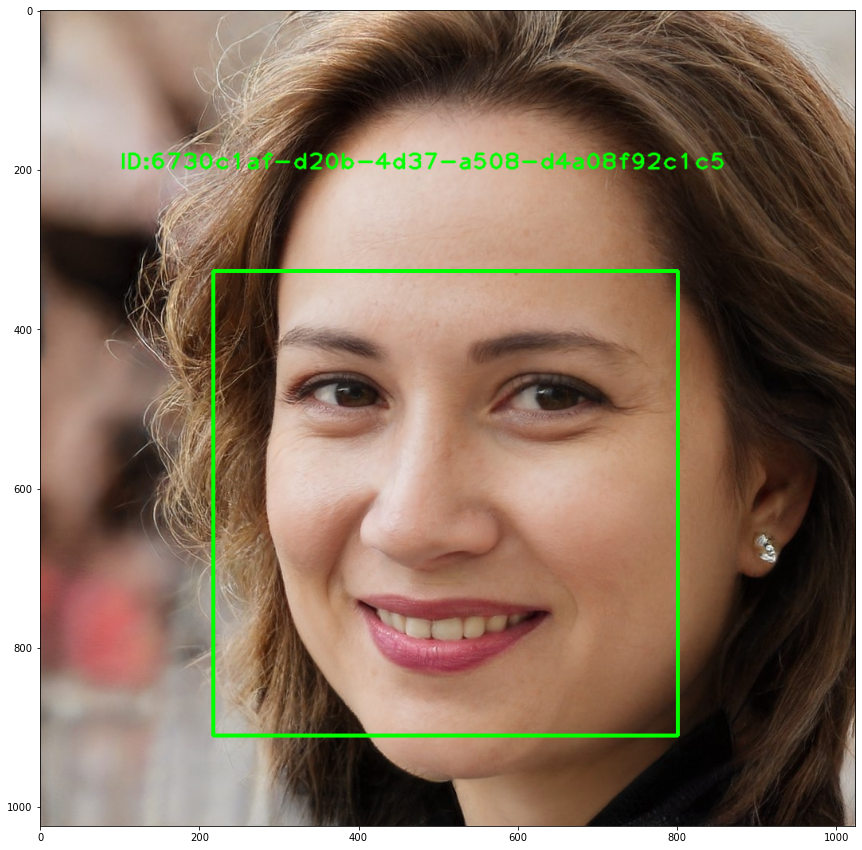

In [14]:
imagefaceapi = image.copy()

result_image = cv2.rectangle(imagefaceapi, (left, top), (left + width, top + height), (0, 255, 0), 3)
msg1 ='ID:' + str(faceid)
result_image = cv2.putText(result_image, msg1, (100, 200), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imwrite("AzureFaceResults1.jpg", result_image)

imageview(result_image)

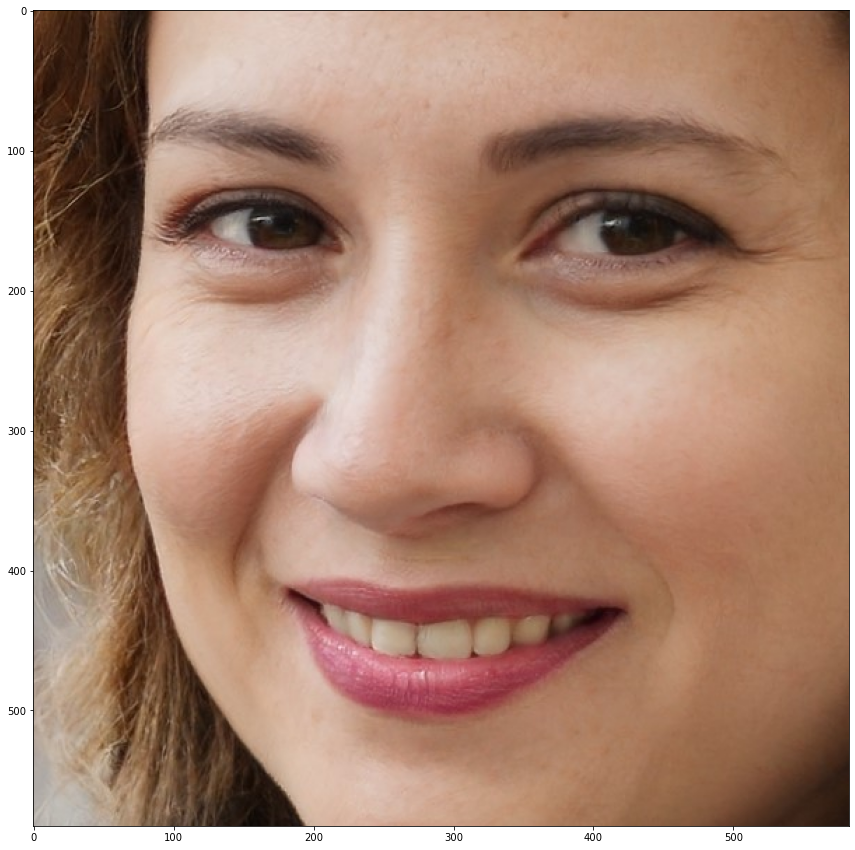

In [15]:
cropface = image.copy()
crop_img = cropface[top:top+height, left:left+width]
imageview(crop_img)

## Face Attributes

In [16]:
for face in faces:
    faceAttributes = face['faceAttributes']
faceAttributes

{'smile': 1.0,
 'headPose': {'pitch': -8.4, 'roll': 1.2, 'yaw': -18.4},
 'gender': 'female',
 'age': 32.0,
 'facialHair': {'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0},
 'glasses': 'NoGlasses',
 'emotion': {'anger': 0.0,
  'contempt': 0.0,
  'disgust': 0.0,
  'fear': 0.0,
  'happiness': 1.0,
  'neutral': 0.0,
  'sadness': 0.0,
  'surprise': 0.0},
 'blur': {'blurLevel': 'low', 'value': 0.0},
 'exposure': {'exposureLevel': 'goodExposure', 'value': 0.63},
 'noise': {'noiseLevel': 'low', 'value': 0.0},
 'makeup': {'eyeMakeup': True, 'lipMakeup': True},
 'accessories': [],
 'occlusion': {'foreheadOccluded': False,
  'eyeOccluded': False,
  'mouthOccluded': False},
 'hair': {'bald': 0.03,
  'invisible': False,
  'hairColor': [{'color': 'brown', 'confidence': 1.0},
   {'color': 'black', 'confidence': 0.72},
   {'color': 'red', 'confidence': 0.34},
   {'color': 'blond', 'confidence': 0.31},
   {'color': 'gray', 'confidence': 0.05},
   {'color': 'other', 'confidence': 0.05},
   {'color': '

## Smile

In [17]:
for face in faces:
    smile = face['faceAttributes']['smile']
smile

1.0

## Facial Hair

In [18]:
for face in faces:
    facialHair = face['faceAttributes']['facialHair']
facialHair

{'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}

In [19]:
for face in faces:
    moustache = face['faceAttributes']['facialHair']['moustache']
moustache

0.0

In [20]:
for face in faces:
    beard = face['faceAttributes']['facialHair']['beard']
beard

0.0

In [21]:
for face in faces:
    sideburns = face['faceAttributes']['facialHair']['sideburns']
sideburns

0.0

## MakeUp

In [22]:
for face in faces:
    makeup = face['faceAttributes']['makeup']
makeup

{'eyeMakeup': True, 'lipMakeup': True}

In [23]:
for face in faces:
    eyeMakeup = face['faceAttributes']['makeup']['eyeMakeup']
eyeMakeup

True

In [24]:
for face in faces:
    lipMakeup = face['faceAttributes']['makeup']['lipMakeup']
lipMakeup

True

## Accessories

In [25]:
for face in faces:
    accessories = face['faceAttributes']['accessories']
accessories

[]

## Occlusion

In [26]:
for face in faces:
    occlusion = face['faceAttributes']['occlusion']
occlusion

{'foreheadOccluded': False, 'eyeOccluded': False, 'mouthOccluded': False}

In [27]:
for face in faces:
    foreheadOccluded = face['faceAttributes']['occlusion']['foreheadOccluded']
foreheadOccluded

False

In [28]:
for face in faces:
    eyeOccluded = face['faceAttributes']['occlusion']['eyeOccluded']
eyeOccluded

False

In [29]:
for face in faces:
    mouthOccluded = face['faceAttributes']['occlusion']['mouthOccluded']
mouthOccluded

False

## Head Pose

<img src="https://docs.microsoft.com/en-us/azure/cognitive-services/face/images/headpose.1.jpg">

In [30]:
for face in faces:
    headPose = face['faceAttributes']['headPose']
headPose

{'pitch': -8.4, 'roll': 1.2, 'yaw': -18.4}

In [31]:
for face in faces:
    pitch = face['faceAttributes']['headPose']['pitch']
pitch

-8.4

In [32]:
for face in faces:
    roll = face['faceAttributes']['headPose']['roll']
roll

1.2

In [33]:
for face in faces:
    yaw = face['faceAttributes']['headPose']['yaw']
yaw

-18.4

## Blur

In [34]:
for face in faces:
    blur = face['faceAttributes']['blur']
blur

{'blurLevel': 'low', 'value': 0.0}

In [35]:
for face in faces:
    blurLevel = face['faceAttributes']['blur']['blurLevel']
blurLevel

'low'

In [36]:
for face in faces:
    value = face['faceAttributes']['blur']['value']
value

0.0

## Exposure

In [37]:
for face in faces:
    exposure = face['faceAttributes']['exposure']
exposure

{'exposureLevel': 'goodExposure', 'value': 0.63}

In [38]:
for face in faces:
    exposureLevel = face['faceAttributes']['exposure']['exposureLevel']
exposureLevel

'goodExposure'

In [39]:
for face in faces:
    value = face['faceAttributes']['exposure']['value']
value

0.63

## Noise

In [40]:
for face in faces:
    noise = face['faceAttributes']['noise']
noise

{'noiseLevel': 'low', 'value': 0.0}

In [41]:
for face in faces:
    noiseLevel = face['faceAttributes']['noise']['noiseLevel']
noiseLevel

'low'

In [42]:
for face in faces:
    value = face['faceAttributes']['noise']['value']
value

0.0

## Age

In [43]:
for face in faces:
    age = face['faceAttributes']['age']
age

32.0

## Gender

In [44]:
for face in faces:
    gender = face['faceAttributes']['gender']
gender

'female'

## Glasses

In [45]:
for face in faces:
    glasses = face['faceAttributes']['glasses']
glasses

'NoGlasses'

## Landmarks

In [46]:
for face in faces:
    faceLandmarks = face['faceLandmarks']
faceLandmarks

{'pupilLeft': {'x': 399.7, 'y': 479.6},
 'pupilRight': {'x': 652.2, 'y': 484.9},
 'noseTip': {'x': 463.6, 'y': 657.9},
 'mouthLeft': {'x': 392.7, 'y': 744.1},
 'mouthRight': {'x': 637.7, 'y': 756.9},
 'eyebrowLeftOuter': {'x': 292.8, 'y': 412.6},
 'eyebrowLeftInner': {'x': 429.2, 'y': 430.2},
 'eyeLeftOuter': {'x': 344.8, 'y': 482.8},
 'eyeLeftTop': {'x': 386.2, 'y': 465.2},
 'eyeLeftBottom': {'x': 382.1, 'y': 499.2},
 'eyeLeftInner': {'x': 424.6, 'y': 490.8},
 'eyebrowRightInner': {'x': 541.8, 'y': 432.7},
 'eyebrowRightOuter': {'x': 750.5, 'y': 431.0},
 'eyeRightInner': {'x': 591.8, 'y': 493.5},
 'eyeRightTop': {'x': 639.4, 'y': 469.1},
 'eyeRightBottom': {'x': 641.6, 'y': 504.7},
 'eyeRightOuter': {'x': 688.6, 'y': 486.9},
 'noseRootLeft': {'x': 456.7, 'y': 495.5},
 'noseRootRight': {'x': 534.1, 'y': 496.7},
 'noseLeftAlarTop': {'x': 427.1, 'y': 604.5},
 'noseRightAlarTop': {'x': 549.3, 'y': 607.4},
 'noseLeftAlarOutTip': {'x': 398.0, 'y': 652.3},
 'noseRightAlarOutTip': {'x': 577.4

In [47]:
for face in faces:
    faceLandmarks = face['faceLandmarks']
    pupilLeftx =  face['faceLandmarks']['pupilLeft']['x']
    pupilRightx =  face['faceLandmarks']['pupilRight']['x']
    noseTipx =  face['faceLandmarks']['noseTip']['x']
    mouthLeftx =  face['faceLandmarks']['mouthLeft']['x']
    mouthRightx =  face['faceLandmarks']['mouthRight']['x']
    eyebrowLeftOuterx =  face['faceLandmarks']['eyebrowLeftOuter']['x']
    eyebrowLeftInnerx =  face['faceLandmarks']['eyebrowLeftInner']['x']
    eyeLeftOuterx =  face['faceLandmarks']['eyeLeftOuter']['x']
    eyeLeftTopx =  face['faceLandmarks']['eyeLeftTop']['x']
    eyeLeftBottomx =  face['faceLandmarks']['eyeLeftBottom']['x']
    eyeLeftInnerx =  face['faceLandmarks']['eyeLeftInner']['x']
    eyebrowRightInnerx =  face['faceLandmarks']['eyebrowRightInner']['x']
    eyebrowRightOuterx =  face['faceLandmarks']['eyebrowRightOuter']['x']
    eyeRightInnerx =  face['faceLandmarks']['eyeRightInner']['x']
    eyeRightTopx =  face['faceLandmarks']['eyeRightTop']['x']
    eyeRightBottomx =  face['faceLandmarks']['eyeRightBottom']['x']
    eyeRightOuterx =  face['faceLandmarks']['eyeRightOuter']['x']
    noseRootLeftx =  face['faceLandmarks']['noseRootLeft']['x']
    noseRootRightx =  face['faceLandmarks']['noseRootRight']['x']
    noseLeftAlarTopx =  face['faceLandmarks']['noseLeftAlarTop']['x']
    noseRightAlarTopx =  face['faceLandmarks']['noseRightAlarTop']['x']
    noseLeftAlarOutTipx =  face['faceLandmarks']['noseLeftAlarOutTip']['x']
    noseRightAlarOutTipx =  face['faceLandmarks']['noseRightAlarOutTip']['x']
    upperLipTopx =  face['faceLandmarks']['upperLipTop']['x']
    upperLipBottomx =  face['faceLandmarks']['upperLipBottom']['x']
    underLipTopx =  face['faceLandmarks']['underLipTop']['x']
    underLipBottomx =  face['faceLandmarks']['underLipBottom']['x']

    pupilLefty =  face['faceLandmarks']['pupilLeft']['y']
    pupilRighty =  face['faceLandmarks']['pupilRight']['y']
    noseTipy =  face['faceLandmarks']['noseTip']['y']
    mouthLefty =  face['faceLandmarks']['mouthLeft']['y']
    mouthRighty =  face['faceLandmarks']['mouthRight']['y']
    eyebrowLeftOutery =  face['faceLandmarks']['eyebrowLeftOuter']['y']
    eyebrowLeftInnery =  face['faceLandmarks']['eyebrowLeftInner']['y']
    eyeLeftOutery =  face['faceLandmarks']['eyeLeftOuter']['y']
    eyeLeftTopy =  face['faceLandmarks']['eyeLeftTop']['y']
    eyeLeftBottomy =  face['faceLandmarks']['eyeLeftBottom']['y']
    eyeLeftInnery =  face['faceLandmarks']['eyeLeftInner']['y']
    eyebrowRightInnery =  face['faceLandmarks']['eyebrowRightInner']['y']
    eyebrowRightOutery =  face['faceLandmarks']['eyebrowRightOuter']['y']
    eyeRightInnery =  face['faceLandmarks']['eyeRightInner']['y']
    eyeRightTopy =  face['faceLandmarks']['eyeRightTop']['y']
    eyeRightBottomy =  face['faceLandmarks']['eyeRightBottom']['y']
    eyeRightOutery =  face['faceLandmarks']['eyeRightOuter']['y']
    noseRootLefty =  face['faceLandmarks']['noseRootLeft']['y']
    noseRootRighty =  face['faceLandmarks']['noseRootRight']['y']
    noseLeftAlarTopy =  face['faceLandmarks']['noseLeftAlarTop']['y']
    noseRightAlarTopy =  face['faceLandmarks']['noseRightAlarTop']['y']
    noseLeftAlarOutTipy =  face['faceLandmarks']['noseLeftAlarOutTip']['y']
    noseRightAlarOutTipy =  face['faceLandmarks']['noseRightAlarOutTip']['y']
    upperLipTopy =  face['faceLandmarks']['upperLipTop']['y']
    upperLipBottomy =  face['faceLandmarks']['upperLipBottom']['y']
    underLipTopy =  face['faceLandmarks']['underLipTop']['y']
    underLipBottomy =  face['faceLandmarks']['underLipBottom']['y']

In [48]:
sizecircle=5
colorcircle=(0, 255, 0)
coloreye=(0,0,255)
colornose=(255,0,0)
colormouth=(0,165,255)

In [49]:
pupilLeft = cv2.circle(result_image, (int(pupilLeftx), int(pupilLefty)), 2, coloreye, sizecircle)
pupilRight = cv2.circle(result_image, (int(pupilRightx), int(pupilRighty)), 2, coloreye, sizecircle)
noseTip = cv2.circle(result_image, (int(noseTipx), int(noseTipy)), 2, colornose, sizecircle)
mouthLeft = cv2.circle(result_image, (int(mouthLeftx), int(mouthLefty)), 2, colormouth, sizecircle)
mouthRight = cv2.circle(result_image, (int(mouthRightx), int(mouthRighty)), 2, colormouth, sizecircle)
eyebrowLeftOuter = cv2.circle(result_image, (int(eyebrowLeftOuterx), int(eyebrowLeftOutery)), 2, colorcircle, sizecircle)
eyebrowLeftInner = cv2.circle(result_image, (int(eyebrowLeftInnerx), int(eyebrowLeftInnery)), 2, colorcircle, sizecircle)
eyeLeftOuter = cv2.circle(result_image, (int(eyeLeftOuterx), int(eyeLeftOutery)), 2, coloreye, sizecircle)
eyeLeftTop = cv2.circle(result_image, (int(eyeLeftTopx), int(eyeLeftTopy)), 2, coloreye, sizecircle)
eyeLeftBottom = cv2.circle(result_image, (int(eyeLeftBottomx), int(eyeLeftBottomy)), 2, coloreye, sizecircle)
eyeLeftInner = cv2.circle(result_image, (int(eyeLeftInnerx), int(eyeLeftInnery)), 2, coloreye, sizecircle)
eyebrowRightInner = cv2.circle(result_image, (int(eyebrowRightInnerx), int(eyebrowRightInnery)), 2, colorcircle, sizecircle)
eyebrowRightOuter = cv2.circle(result_image, (int(eyebrowRightOuterx), int(eyebrowRightOutery)), 2, colorcircle, sizecircle)
eyeRightInner = cv2.circle(result_image, (int(eyeRightInnerx), int(eyeRightInnery)), 2, coloreye, sizecircle)
eyeRightTop = cv2.circle(result_image, (int(eyeRightTopx), int(eyeRightTopy)), 2, coloreye, sizecircle)
eyeRightBottom = cv2.circle(result_image, (int(eyeRightBottomx), int(eyeRightBottomy)), 2, coloreye, sizecircle)
eyeRightOuter = cv2.circle(result_image, (int(eyeRightOuterx), int(eyeRightOutery)), 2, coloreye, sizecircle)
noseRootLeft = cv2.circle(result_image, (int(noseRootLeftx), int(noseRootLefty)), 2, colornose, sizecircle)
noseRootRight = cv2.circle(result_image, (int(noseRootRightx), int(noseRootRighty)), 2, colornose, sizecircle)
noseLeftAlarTop = cv2.circle(result_image, (int(noseLeftAlarTopx), int(noseLeftAlarTopy)), 2, colornose, sizecircle)
noseRightAlarTop = cv2.circle(result_image, (int(noseRightAlarTopx), int(noseRightAlarTopy)), 2, colornose, sizecircle)
noseLeftAlarOutTip = cv2.circle(result_image, (int(noseLeftAlarOutTipx), int(noseLeftAlarOutTipy)), 2, colornose, sizecircle)
noseRightAlarOutTip = cv2.circle(result_image, (int(noseRightAlarOutTipx), int(noseRightAlarOutTipy)), 2, colornose, sizecircle)
upperLipTop = cv2.circle(result_image, (int(upperLipTopx), int(upperLipTopy)), 2, colormouth, sizecircle)
upperLipBottom = cv2.circle(result_image, (int(upperLipBottomx), int(upperLipBottomy)), 2, colormouth, sizecircle)
underLipTop = cv2.circle(result_image, (int(underLipTopx), int(underLipTopy)), 2, colormouth, sizecircle)
underLipBottom = cv2.circle(result_image, (int(underLipBottomx), int(underLipBottomy)), 2, colormouth, sizecircle)

cv2.imwrite("AzureFaceResults2.jpg", result_image)

True

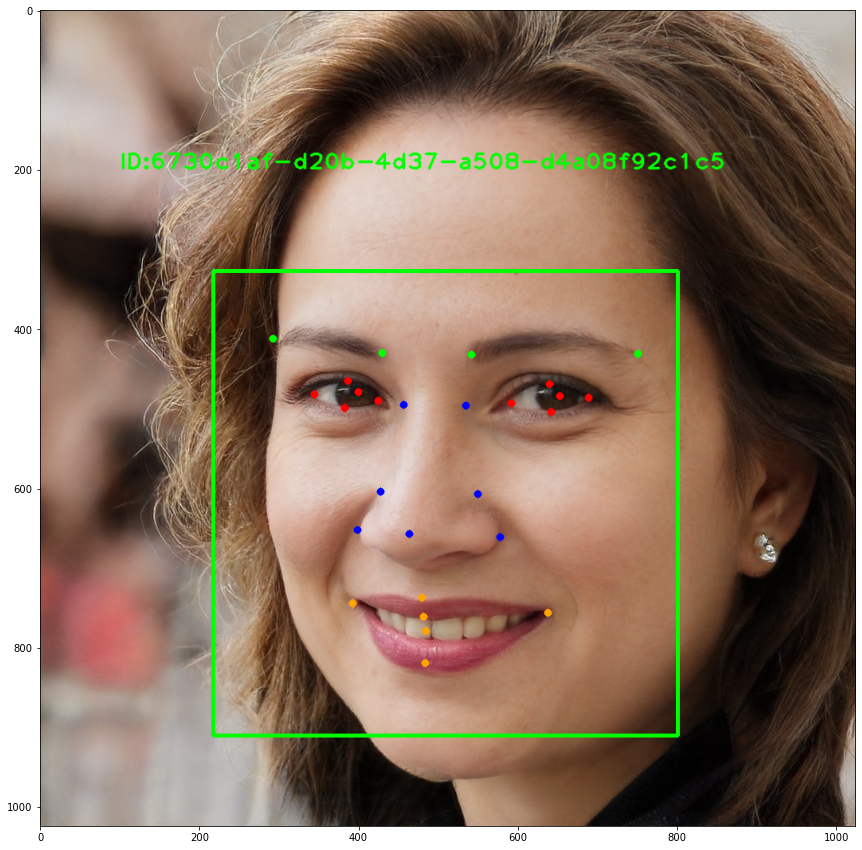

In [50]:
imageview(result_image)

## Emotions

In [51]:
for face in faces:
    emotions = face['faceAttributes']['emotion']
emotions

{'anger': 0.0,
 'contempt': 0.0,
 'disgust': 0.0,
 'fear': 0.0,
 'happiness': 1.0,
 'neutral': 0.0,
 'sadness': 0.0,
 'surprise': 0.0}

In [52]:
topsentiment = max(emotions.items(), key=operator.itemgetter(1))[0]
probtopsentiment = max(emotions.items(), key=operator.itemgetter(1))[1]
print('Sentiment :', topsentiment, 'with confidence =', probtopsentiment)

Sentiment : happiness with confidence = 1.0


## Hair Color

In [53]:
for face in faces:
    hair = face['faceAttributes']['hair']
hair

{'bald': 0.03,
 'invisible': False,
 'hairColor': [{'color': 'brown', 'confidence': 1.0},
  {'color': 'black', 'confidence': 0.72},
  {'color': 'red', 'confidence': 0.34},
  {'color': 'blond', 'confidence': 0.31},
  {'color': 'gray', 'confidence': 0.05},
  {'color': 'other', 'confidence': 0.05},
  {'color': 'white', 'confidence': 0.0}]}

In [54]:
for face in faces:
    bald = face['faceAttributes']['hair']['bald']
bald

0.03

In [55]:
for face in faces:
    invisible = face['faceAttributes']['hair']['invisible']
invisible

False

In [56]:
for face in faces:
    haircolor = face['faceAttributes']['hair']['hairColor']
haircolor

[{'color': 'brown', 'confidence': 1.0},
 {'color': 'black', 'confidence': 0.72},
 {'color': 'red', 'confidence': 0.34},
 {'color': 'blond', 'confidence': 0.31},
 {'color': 'gray', 'confidence': 0.05},
 {'color': 'other', 'confidence': 0.05},
 {'color': 'white', 'confidence': 0.0}]

In [57]:
count=int(0)
prob=0
index=0  
while count < len(haircolor):
    prob1=haircolor[count]['confidence']
    if prob < prob1:
        prob=prob1
        index=count
    count = count + 1

In [58]:
haircolormax=haircolor[index]['color']
haircolorscoremax=haircolor[index]['confidence']
print("Haircolor prediction:", haircolormax, 'with score =', haircolorscoremax)

Haircolor prediction: brown with score = 1.0


## Distances calculation

In [59]:
pixels_per_metric = float(0.4) # Need for calibration (a common object can be used)

def pixel_to_mm(pixels):
    mm = pixels_per_metric * pixels
    print(pixels, 'pixels', '=', mm, 'mm')
    return mm

In [60]:
distancebetweeneyes_pix = abs(noseRightAlarTopx-noseLeftAlarTopx)
print('Distance between Eyes:')
distancebetweeneyes_mm=pixel_to_mm(distancebetweeneyes_pix)

Distance between Eyes:
122.19999999999993 pixels = 48.879999999999974 mm


In [61]:
pupildistance_pix=abs(pupilLeftx-pupilRightx)
print('Distance between Pupils:')
pupildistance_mm=pixel_to_mm(pupildistance_pix)

Distance between Pupils:
252.50000000000006 pixels = 101.00000000000003 mm


In [62]:
EyeLeftHeight=abs(eyeLeftTopy-eyeLeftBottomy)
EyeLeftWidth=abs(eyeLeftInnerx-eyeLeftOuterx)
EyeLeftSurface_pix=EyeLeftHeight*EyeLeftWidth/2

EyeRightHeight=abs(eyeRightTopy-eyeRightBottomy)
EyeRightWidth=abs(eyeRightInnerx-eyeRightOuterx)
EyeRightSurface_pix=EyeRightHeight*EyeRightWidth/2

In [63]:
print('Eye Left Height')
pixel_to_mm(EyeLeftHeight)

Eye Left Height
34.0 pixels = 13.600000000000001 mm


13.600000000000001

In [64]:
print('Eye Left Width')
pixel_to_mm(EyeLeftWidth)

Eye Left Width
79.80000000000001 pixels = 31.920000000000005 mm


31.920000000000005

In [65]:
print('Eye Right Height')
pixel_to_mm(EyeRightHeight)

Eye Right Height
35.599999999999966 pixels = 14.239999999999988 mm


14.239999999999988

In [66]:
print('Eye Right Width')
pixel_to_mm(EyeRightWidth)

Eye Right Width
96.80000000000007 pixels = 38.72000000000003 mm


38.72000000000003

In [67]:
print('Eye Left Surface')
pixel_to_mm(EyeLeftSurface_pix)

Eye Left Surface
1356.6000000000001 pixels = 542.6400000000001 mm


542.6400000000001

In [68]:
print('Eye Right Surface')
pixel_to_mm(EyeRightSurface_pix)

Eye Right Surface
1723.0399999999995 pixels = 689.2159999999999 mm


689.2159999999999

In [69]:
data = {
'Image': [image_file],
'ID': [faceid],
'Age': [age],
'Gender':  [gender],
'Sentiment': [topsentiment],
}
df = pd.DataFrame(data)
#df = df.T
df.head()

Image                                    ID   Age  Gender  Sentiment
0  test1.jpg  6730c1af-d20b-4d37-a508-d4a08f92c1c5  32.0  female  happiness

In [70]:
df.to_csv("AzureFaceResults.csv")

## Mask Detection

In [71]:
#imagefile='https://th.bing.com/th/id/OIP.fAwb_GEDeZo5peIJud2XQgHaE7?pid=ImgDet&rs=1'
imagefile='https://th.bing.com/th/id/R.bfd353404f409e29d7a0c14f99cf8956?rik=Nadfi%2fXyjivjJA&pid=ImgRaw&r=0'
#imagefile='https://cdn-s-www.bienpublic.com/images/40BE6284-007B-4890-BE61-7EA6298E8134/NW_raw/jean-paul-belmondo-pleure-son-quot-ami-quot-jean-pierre-marielle-quot-j-etais-son-ombre-il-etait-la-mienne-quot-photo-stephane-de-sakutin-afp-1556196114.jpg'

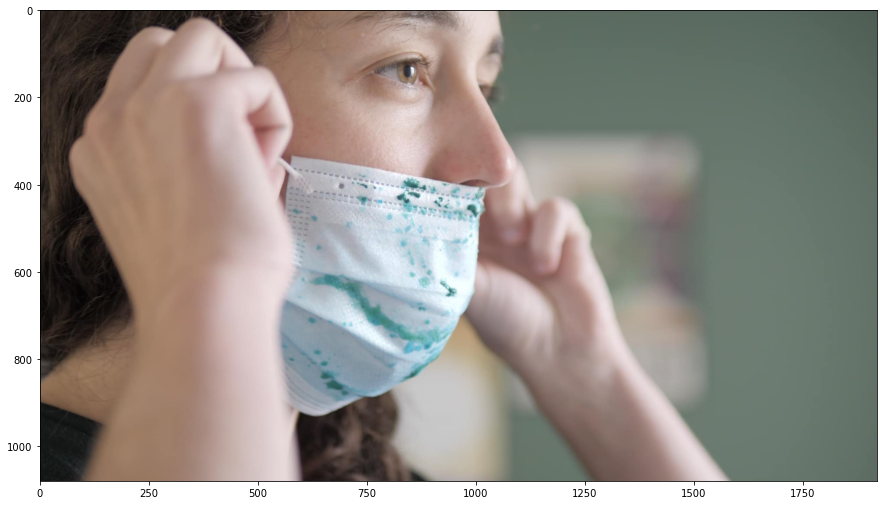

In [72]:
import urllib
image_file = 'testmask.jpg'
urllib.request.urlretrieve(imagefile, filename=image_file)
imagemask = cv2.imread(image_file)
imageview(imagemask)

In [74]:
facemaskapi_url = face_endpoint  + '/face/v1.0/detect?detectionmodel=detection_03'
headers = {'Ocp-Apim-Subscription-Key': face_api_key  }
params = {
    'returnFaceId': 'true',
    'returnFaceLandmarks': 'false',
    'returnFaceAttributes': 'mask',
}
response = requests.post(facemaskapi_url, params=params, headers=headers, json={"url": imagefile})
resp=response.json()
resp

[{'faceId': '43f6da4d-ef87-4da8-98bf-d816598f60bf',
  'faceRectangle': {'top': 36, 'left': 441, 'width': 702, 'height': 801},
  'faceAttributes': {'mask': {'type': 'faceMask',
    'noseAndMouthCovered': False}}}]

In [75]:
for resps in resp:
    mask = resp[0]['faceAttributes']['mask']
mask

{'type': 'faceMask', 'noseAndMouthCovered': False}

In [76]:
maskon=mask['type']
nosemouthcovered=mask['noseAndMouthCovered']

if maskon == 'faceMask':
    if nosemouthcovered == True:
        msg = 'OK! This person is wearing a mask and nose & mouth are covered'
        color = (0,128,0)
    if nosemouthcovered == False:
        msg='Not OK! This person is wearing a mask but nose & mouth are not covered'
        color = (0, 165, 255)
if maskon != 'faceMask':
    msg='Not OK! This person is not wearing a mask'
    color = (0, 0, 255)

print(msg)

Not OK! This person is wearing a mask but nose & mouth are not covered


In [77]:
cv2.putText(imagemask, msg, (20, 50), cv2.FONT_HERSHEY_PLAIN,2, color, 2, cv2.LINE_AA)
cv2.imwrite("mask.jpg", imagemask)

True

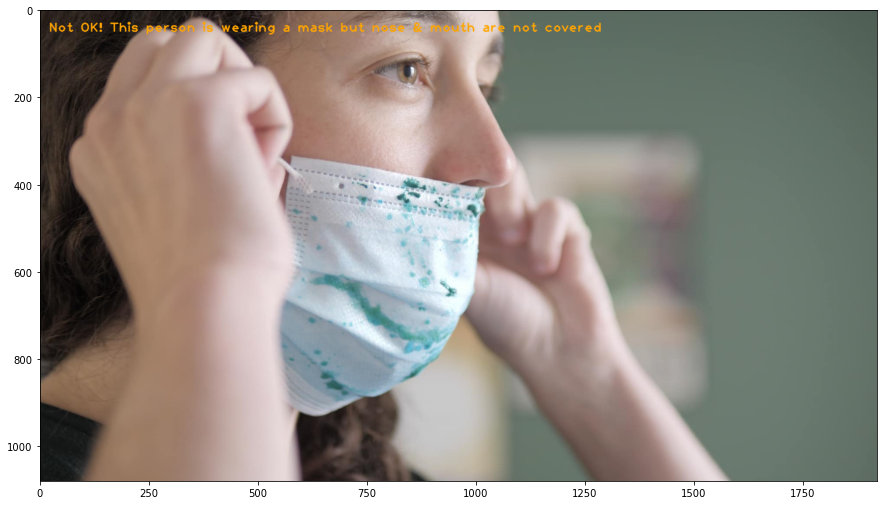

In [78]:
imageview(imagemask)